![title](./images/Exercise_5.6.png)

# Soluzione

### (i) calcolare la matrice A che rappresenta questo algoritmo e verificare che sia row-stochastic

La matrice A che rappresenta il sistema è il seguente: 
$$ 
A = \begin{bmatrix}
1 & 0 \\
\alpha & 1-\alpha
\end{bmatrix}
$$

Le matrici si dicono _row-stocastic_ se la somma di tutti gli elementi di una riga è pari a 1, quindi data la matrice A composta dagli elementi $a_{\text{i,j}}$ dove i={1,2,..,N}:

$$
\begin{align*}
{\sum_{j=1}^{N}a_{i,j}=1}
\end{align*}
$$


nel caso della matrice di cui sopra, tale definizione è rispettata per cui, la condizione è verificata

### (ii) calcolare gli autovalori e gli autovettori sinistri e destri di A

Data l'equazione caratteristica:

$$\det(A - \lambda I) = 0$$

è possibile calcorare gli autovalori $\lambda$ di A. 

In particolare: 

$$\lambda_1 = 1 , \lambda_2 = 1 - \alpha$$

Gli autovettori dx corrispondenti:

- Per $\lambda_1 = 1$:
  $$ 
  A = \begin{bmatrix}
    0 & 0 \\
    \alpha & -\alpha
    \end{bmatrix}
    \cdot \begin{pmatrix} x \\ y \end{pmatrix}
    = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
  $$

$v_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$.

- Per $\lambda_2 = 1 - \alpha$:
  $$ 
  A = \begin{bmatrix}
    \alpha & 0 \\
    \alpha & 0
    \end{bmatrix}
    \cdot \begin{pmatrix} x \\ y \end{pmatrix}
    = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
  $$

$v_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

Quindi, gli autovalori dx sono $\lambda_1 = 1$ con autovettore $v_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ e $\lambda_2 = 1 - \alpha$ con autovettore $v_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

attraverso codice si ha che:

In [43]:
#import delle librerie numpy e matplotlib
import sympy as sp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

x = sp.symbols('x')

A = sp.Matrix([[1,0],
            [x, 1-x]])

#Restituiste tupla di info tra cui autovalore, molteplicità e autovettore
eigenvectors = A.eigenvects()

for eigenvalues, grade, eigenvect in eigenvectors:
    print("Eigenvalues: ", eigenvalues)
    print("Grade: ", grade)
    print("Eigenvectors: ")
    for vect in eigenvect:
        print("Eigenvect", vect)
    print()

Eigenvalues:  1
Grade:  1
Eigenvectors: 
Eigenvect Matrix([[1], [1]])

Eigenvalues:  1 - x
Grade:  1
Eigenvectors: 
Eigenvect Matrix([[0], [1]])



### (iii) disegnare il DiGraph e discuterne le proprietaà di connessione

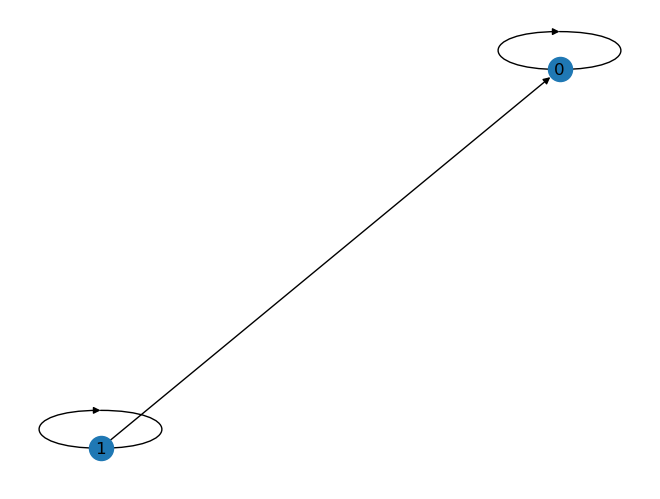

In [44]:
#impostando x=3 si ha

W = np.array([[1,0],
              [3,-4]])

order = list(range(len(W)))

# Creiamo il digrafo partendo dalla matrice di adiacenza
G = nx.DiGraph(W)

# Imposta l'ordine dei nodi nel digrafo
G = nx.relabel_nodes(G, dict(zip(G.nodes(), order)))

# Disegniamo il grafico
pos = nx.spring_layout(G)  # posizione per tutti i nodi
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()


- Il nodo 1 non è raggiungibile globalmente poiché non esiste un percorso dal nodo 0 al nodo 1.
- Il nodo 0 è raggiungibile globalmente poiché esiste un percorso dal nodo 1 al nodo 0.

### (iv) disegnare il condensation Graph

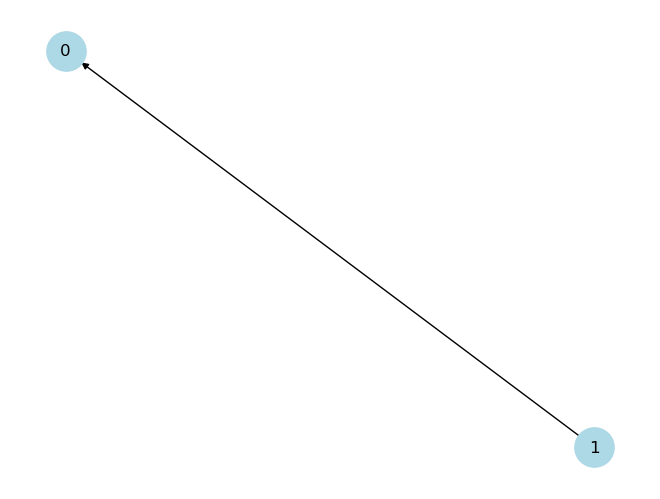

In [45]:
#CondensationGraph 
condensation = nx.algorithms.components.condensation(G)

nx.draw(condensation, with_labels=True, node_color='lightblue', node_size=800, font_size=12)
plt.show()

### (v) Calcolo del valore finale:
- Richiamando l'Esercizio E2.9:

  Dall'Esercizio E2.9, il valore finale di questo algoritmo può essere trovato utilizzando la formula del punto di equilibrio:

    $$
    x^* = (I - A)^{-1} b
    $$
    
    Per questo sistema, $ A $ è già stocastica per righe, quindi 
    $$ 
    I - A = \begin{pmatrix} 0 & 0 \\ -\alpha & \alpha \end{pmatrix} 
    $$
    
    $$
    det(I - A) = 0
    $$
    Essendo il determinante pari a 0 la matrice (I - A) è singolare.
    Questo metodo non può essere applicato direttamente.

- Invocando il Teorema 5.1:
    Dal Teorema 5.1, poiché G ha un nodo globalmente raggiungibile e il sottografo dei nodi globalmente raggiungibili è aperiodico (il nodo 2 è aperiodico), il sistema soddisfa le condizioni del teorema.

  L'autovettore dominante sinistro w corrisponde all'autovalore 1, che in questo caso è $\begin{pmatrix} 1 & 1 \end{pmatrix}$

  Quindi il valore finale del sistema è:
  
    $$
  \lim_{k \rightarrow \infty} x(k) = \left(w^{\top} x(0)\right) \mathbb{1}_n = x_1(0)\begin{pmatrix} 1 \\ 1 \end{pmatrix}
  $$

![title](./images/es5.7.jpg)

## Soluzione

### (i) Calcola la matrice A che rappresenta questo algoritmo e verifica che sia a righe stocastiche:

Dato che $s_{+1} + s_{-1} = 1$, possiamo esprimere $s_{-1}$ come $1 - s_{+1}$.

La matrice $A$ può essere rappresentata come segue:

$$
A = \begin{pmatrix} s_{+1} & 1 - s_{+1}
\\ 1 - s_{-1} & s_{-1} \end{pmatrix}
$$

Le matrici si dicono _row-stocastic_ se la somma di tutti gli elementi di una riga è pari a 1, quindi data la matrice A composta dagli elementi $a_{\text{i,j}}$ dove i={1,2,..,N}:

$$
\begin{align*}
{\sum_{j=1}^{N}a_{i,j}=1}
\end{align*}
$$

la matrice di cui sopra è facilmente dimostrabile essere row_stochastic


### (ii) Calcola $A^2$

In [40]:
a = sp.symbols('a')
b = sp.symbols('b')

A = sp.Matrix([[a, 1-a],
            [1-b, b]])

AA = A*A
print(AA)

Matrix([[a**2 + (1 - a)*(1 - b), a*(1 - a) + b*(1 - a)], [a*(1 - b) + b*(1 - b), b**2 + (1 - a)*(1 - b)]])


$$
AA = \begin{pmatrix}
a^2 + (1 - a)(1 - b) & a(1 - a) + b(1 - a) \\
a(1 - b) + b(1 - b) & b^2 + (1 - a)(1 - b)
\end{pmatrix}
$$


### (iii) Autovalori, autovettori

In [41]:
#Restituiste tupla di info tra cui autovalore, molteplicità e autovettore
eigenvectors = A.eigenvects()

for eigenvalues, grade, eigenvect in eigenvectors:
    print("Eigenvalues: ", eigenvalues)
    print("Grade: ", grade)
    print("Eigenvectors: ")
    for vect in eigenvect:
        print("Eigenvect", vect)
    print()

Eigenvalues:  1
Grade:  1
Eigenvectors: 
Eigenvect Matrix([[1], [1]])

Eigenvalues:  a + b - 1
Grade:  1
Eigenvectors: 
Eigenvect Matrix([[(1 - a)/(b - 1)], [1]])



### (iv) Calcola il valore finale di questo algoritmo come funzione dei valori iniziali e dei livelli di autoconfidenza. È vero che un individuo con una maggiore autostima contribuisce di più al valore finale?

Per calcolare il valore finale, dobbiamo trovare lo stato stazionario del sistema. Questo può essere fatto trovando l'autovettore corrispondente all'autovalore 1.

Per quanto riguarda se un individuo con una maggiore autostima contribuisce di più al valore finale, dipende dai valori specifici di $s_{+1}$ e $s_{-1}$. In generale, un individuo con una maggiore autostima avrà una maggiore influenza sul valore finale, ma l'estensione di questa influenza sarà influenzata dai valori iniziali e dai livelli di autostima relativi di entrambi gli individui.